In [1]:
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
import os
import seaborn as sns
import pickle
import pandas as pd
from sklearn.decomposition import PCA


In [2]:
def norm(matrix):
    return (matrix - matrix.mean(axis=0)) / (matrix.std(axis=0)+1e-9)
def load_pretrained_emb_weight(model,dataset):
    path = os.path.join('saved',model,dataset, 'pretrain.pth')

    # path = path_dict[dataset_name]
    saved = torch.load(path, map_location='cpu',weights_only=False)
    pretrained_emb_weight = saved['item_embedding.weight']
    return norm(pretrained_emb_weight.detach().numpy()[1:])

In [5]:
def get_emb_all(dataset):
    model_list = ['adrec', 'sasrec', 'diffurec', 'dreamrec']
    # model_list = ['sasrec']
    emb_list = []
    for model in model_list:
        emb_list.append(load_pretrained_emb_weight(model, dataset))
    emb_list.append(norm(np.random.normal(size=emb_list[0].shape))[1:])
    print(emb_list[0].shape)
    model_list.append('gaussian')
    return emb_list, model_list

In [13]:
 def get_tsne_all(emb_list):
    tsne_list=[]
    # pca = PCA(n_components=2) 
    for emb in emb_list:
        # emb = pca.fit_transform(emb)
        tsne_list.append(TSNE(n_components=2, random_state=2024,init='pca').fit_transform(emb))
    print('tsne done!')
    return tsne_list

In [5]:
def draw_three(data,model_name,data_name,vmax=60,l=40,save=False):
    sns.set_context("paper")
    # sns.set_style("dark", {"axes.facecolor": ".3"})
    sns.set_style("dark")
    plt.subplots(figsize=(5, 5))
    sns.despine(left=True, bottom=True)
    plt.xticks([])
    plt.yticks([])
    plt.xlim(-1*l,l)
    plt.ylim(-1*l,l)
    cbar = sns.cubehelix_palette(start=2.7, light=1, as_cmap=True)
    # cbar = sns.color_palette("mako", as_cmap=True)
    # sns.scatterplot(x=data[:,0], y=data[:,1], s=3, color=".3",edgecolors='none')
    sns.histplot(x=data[:,0], y=data[:,1], bins=30, pthresh=.0,stat="percent", cmap=cbar,cbar=False)
    sns.kdeplot(x=data[:,0], y=data[:,1],levels=5, color=".6", linewidths=1)
    # sns.kdeplot(x=data[:,0], y=data[:,1],cmap=cbar, fill=True, thresh=0, levels=15, cut=100,)
    # sns.color_palette("mako", as_cmap=True)
    if not os.path.exists(f'../imgs/tsne/{data_name}'):
        os.makedirs(f'../imgs/tsne/{data_name}')
    if save:
        plt.savefig(f'../imgs/tsne/{data_name}/tSNE_map_{model_name}_{l}.svg', dpi=300,bbox_inches='tight')
    plt.show()
    plt.close()

In [26]:
def draw_all(tsne_list, model_list,data_name,l,save=False):
    l_list = [l,l,l,l/0.5,l/2.5]
    for i in range(len(tsne_list)):
        # draw_three(tsne_list[i],model_list[i],data_name=data_name,l=l_list[0])
        draw_three(tsne_list[i],model_list[i],data_name=data_name,l=l_list[i],save=save)

In [22]:
data_name= 'yelp'
emb_list,model_list = get_emb_all(dataset=data_name)
tsne_list = get_tsne_all(emb_list)

(64669, 128)
tsne done!


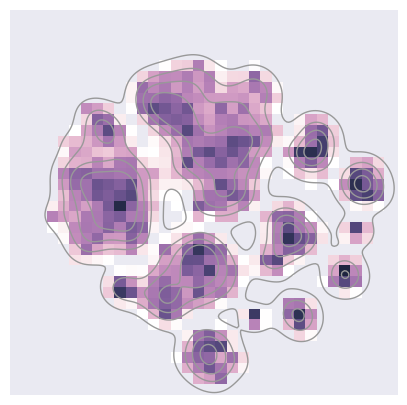

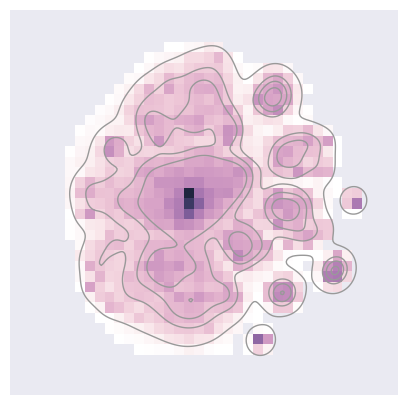

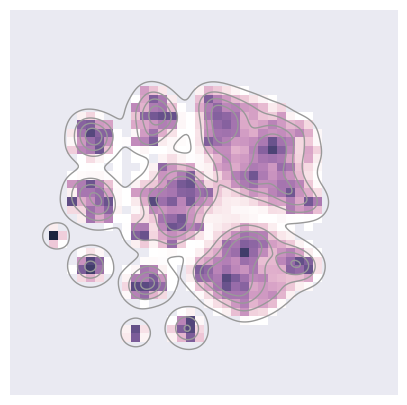

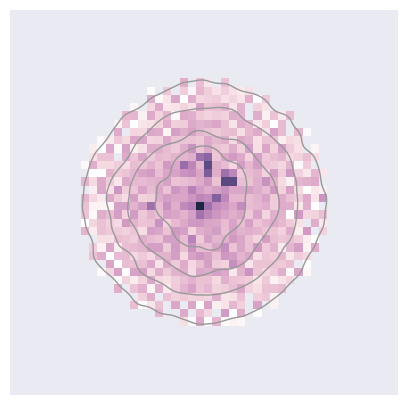

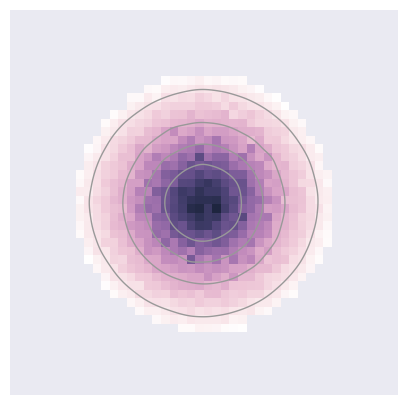

In [28]:
# draw_all(tsne_list, model_list,data_name=data_name, l=100)
draw_all(tsne_list, model_list,data_name=data_name, l=100,save=True)